In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

### Read Data

In [4]:
# Import image class of matplotlib
import matplotlib.image as img

# Read batman image and print dimensions
path = "harry.jpg"
arrow_path = "arrow.png"
image = img.imread(path)
arrow = img.imread(arrow_path)
print("Shape of image is",image.shape,"and arrow is",arrow.shape)

Shape of image is (330, 620, 3) and arrow is (630, 1200, 4)


Given Image is ===>


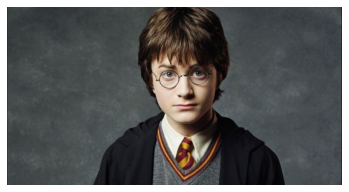

In [8]:
print("Given Image is ===>")
plt.axis('off')
plt.imshow(image)
plt.show()

### Prepare Data

In [9]:
r,g,b=[],[],[]
# Store RGB values of all pixels in lists r, g and b
for row in image:
    for temp_r, temp_g, temp_b in row:
        r.append(temp_r)
        g.append(temp_g)
        b.append(temp_b)

In [10]:
from scipy.cluster.vq import whiten #Whiten is used to Scale the data

scaled_red = whiten(r)
scaled_blue = whiten(b)
scaled_green = whiten(g)

In [11]:
import pandas as pd
df = pd.DataFrame({'red':r,'blue':b,'green':g,
                   'scaled_red':scaled_red,
                   'scaled_blue':scaled_blue,
                   'scaled_green':scaled_green})
df.head()

,red,blue,green,scaled_red,scaled_blue,scaled_green
0,36,42,42,0.920354,1.240788,1.156027
1,57,63,63,1.457228,1.861181,1.734040
2,55,61,61,1.406097,1.802096,1.678992
3,56,62,62,1.431662,1.831639,1.706516
4,60,66,66,1.533924,1.949809,1.816614


### Optimal Number of Clusters

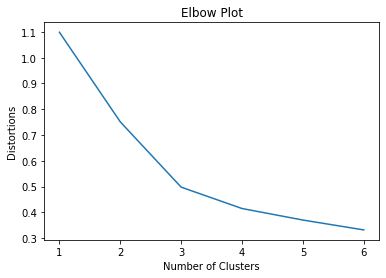

In [12]:
from scipy.cluster.vq import kmeans,vq

distortions = []
num_clusters = range(1, 7)

# Create a list of distortions from the kmeans function
for i in num_clusters:
    cluster_centers, distortion = kmeans(df[['scaled_red','scaled_blue','scaled_green']],i)
    distortions.append(distortion)

# Create a data frame with two lists, num_clusters and distortions
elbow_plot = pd.DataFrame({'num_clusters':num_clusters,'distortions':distortions})

# Create a line plot of num_clusters and distortions
sns.lineplot(x='num_clusters', y='distortions', data = elbow_plot)
plt.xticks(num_clusters)
plt.title('Elbow Plot')
plt.xlabel('Number of Clusters')
plt.ylabel("Distortions")
plt.show()

`We can see from Elbow Plot, Optimal Number of Clusters is 3`

### Data Modelling

In [13]:
cluster_centers, distortion = kmeans(df[['scaled_red','scaled_blue','scaled_green']],
                                     3)
print(cluster_centers)

[[5.33816036 4.96040742 5.17732052]
 [1.89960965 2.30473302 2.13820483]
 [0.68948216 0.63232714 0.57905332]]


### Mathematical Concept

To display the dominant colors, convert the colors of the cluster centers to their raw values and then converted them to the range of 0-1, using the following formula: 

converted_pixel = standardized_pixel * pixel_std / 255

In [14]:
# Get standard deviations of each color
r_std, g_std, b_std = df[['red', 'green', 'blue']].std()

colors = []

for cluster_center in cluster_centers:
    scaled_r, scaled_g, scaled_b = cluster_center
    # Convert each standardized value to scaled value
    colors.append((
        scaled_r * r_std / 255,
        scaled_g * g_std / 255,
        scaled_b * b_std / 255
    ))

Original Image is ===> 


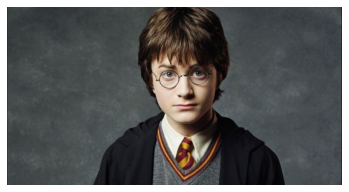

Extracting Colors from Image using KMeans Clustering ====>


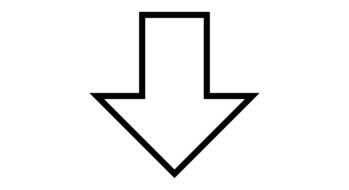

Dominant Colors of Image are===>


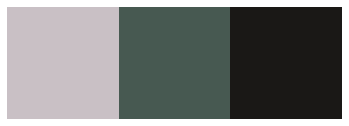

In [15]:
print("Original Image is ===> ")
plt.axis('off')
plt.imshow(image)
plt.show()

print("Extracting Colors from Image using KMeans Clustering ====>")
plt.axis('off')
plt.imshow(arrow)
plt.show();

print("Dominant Colors of Image are===>")
plt.axis('off')
plt.imshow([colors])
plt.show()